In [1]:
import h5py
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from utils import (coupling_coef_corrs,
                   selection_profiles_by_chance,
                   get_dataset,
                   create_graph)
%matplotlib inline

In [2]:
fits_path = '/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5'

In [4]:
fits = h5py.File(fits_path, 'r')

In [24]:
np.median(fits['UoI_Lasso_AIC/r2'], axis=0)

array([-6.58739009e-02, -4.01539327e-01, -2.78989243e+00, -2.35585985e+00,
       -1.27574646e+00, -5.48037551e-01, -3.07805238e+00, -5.94884485e-03,
       -1.03810442e+00, -2.07242108e-01, -6.78561813e-03, -5.67919751e+00,
       -1.19368121e+00, -4.90431751e-03, -4.06039664e-01, -9.15570200e+00,
       -6.57980154e-02, -4.44761752e-01, -4.01130646e-01, -1.47729071e-01,
       -6.53488215e-02, -8.45008808e-01, -2.66489389e+00, -9.84384291e-02,
       -9.29352568e-01,  1.43378827e-02,  8.77071995e-02, -5.23968631e-01,
       -2.88452809e+00, -1.82074181e+00, -2.32739489e+00, -2.50390553e+00,
       -4.09752566e-01, -3.40146563e-02, -2.74902874e-01, -7.78625737e+00,
       -1.65980025e-01, -3.79261553e+00, -9.68850131e-01, -3.02275997e+00,
       -1.22970071e-01, -1.86355744e-02, -1.50419981e+00, -8.35328463e+00,
       -7.63281337e+00, -4.83787630e+00, -6.88640458e+00, -3.74557726e-01,
       -3.87070076e-01, -3.90193250e-01, -4.54514374e+00, -9.27445057e-01,
       -1.02469313e+00, -

In [22]:
np.count_nonzero(np.median(fits['UoI_Lasso_AIC/coupling_coefs'], axis=0))/np.count_nonzero(np.median(fits['Lasso/coupling_coefs'], axis=0))

0.14277233600474917

In [8]:
G_poisson = create_graph(fits_path, dataset='UoI_Poisson_log', directed=False)
G_lasso = create_graph(fits_path, dataset='UoI_Lasso_r2', directed=False)
G_lasso2 = create_graph(fits_path, dataset='Lasso', directed=False)

In [9]:
print(np.corrcoef(
    np.array(list(nx.algorithms.centrality.degree_centrality(G_poisson).values())),
    np.array(list(nx.algorithms.centrality.degree_centrality(G_lasso).values())))[0, 1])


print(np.corrcoef(
    np.array(list(nx.algorithms.centrality.degree_centrality(G_lasso).values())),
    np.array(list(nx.algorithms.centrality.degree_centrality(G_lasso2).values())))[0, 1])

0.9192222546441138
0.9463535225491538


3990

In [ ]:
nx.algorithms.smallworld.sigma(G_poisson)

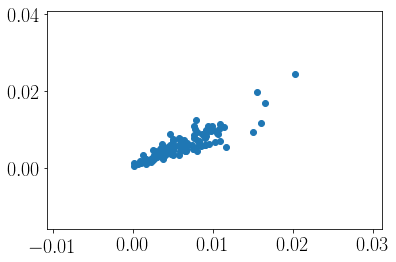

In [55]:
plt.scatter(np.array(list(nx.algorithms.centrality.betweenness_centrality(G_poisson).values())),
    np.array(list(nx.algorithms.centrality.betweenness_centrality(G_lasso).values())))

In [4]:
uoi_poisson_coefs = np.median(fits['UoI_Poisson_log/coupling_coefs'][:], axis=0)
uoi_lasso_coefs = np.median(fits['UoI_Lasso_r2/coupling_coefs'][:], axis=0)
glmnet_coefs = np.median(fits['glmnet/coupling_coefs'][:].T, axis=0)

(array([ 1.,  0.,  0.,  1.,  7.,  5., 22., 23., 49., 28.]),
 array([-0.0023591 ,  0.09209732,  0.18655374,  0.28101015,  0.37546657,
         0.46992299,  0.56437941,  0.65883583,  0.75329224,  0.84774866,
         0.94220508]),
 <a list of 10 Patch objects>)

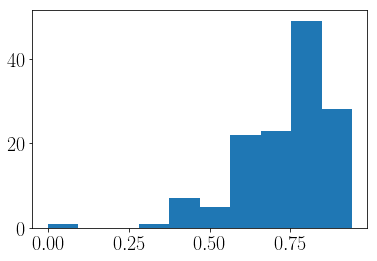

In [5]:
corrs = coupling_coef_corrs(
    fits_path='/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5',
    dataset1='UoI_Poisson_log',
    dataset2='UoI_Lasso_r2')
plt.hist(corrs)

In [8]:
probs = selection_profiles_by_chance(
    fits_path='/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5',
    dataset1='UoI_Poisson_log',
    dataset2='UoI_Lasso_r2'
)

In [11]:
uoi_poisson_sr = get_dataset(
    fits_path='/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5',
    metric='selection_ratio',
    key='UoI_Poisson_log'
)

uoi_lasso_sr = get_dataset(
    fits_path='/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5',
    metric='selection_ratio',
    key='UoI_Lasso_r2'
)

lasso_sr = get_dataset(
    fits_path='/Users/psachdeva/fits/uoineuro/nhp/nhp_M1_indy_20160407_02.h5',
    metric='selection_ratio',
    key='Lasso'
)

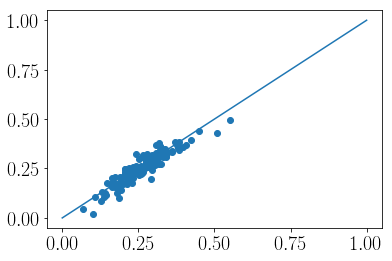

In [10]:
plt.scatter(uoi_lasso_sr, uoi_poisson_sr)
plt.plot([0, 1], [0, 1])

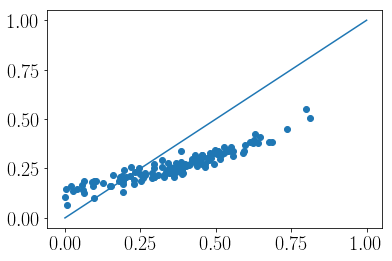

In [15]:
plt.scatter(lasso_sr, uoi_lasso_sr)
plt.plot([0, 1], [0, 1])

In [7]:
import networkx as nx

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from(np.arange(5))

In [13]:
G.add_edges_from([(0, 1), (1,2), (1, 0)])

In [14]:
G.edges()

EdgeView([(0, 1), (1, 2)])

In [51]:
A = np.array([[0, 1.5, 0], [2.3, 0, 300], [0, 0, 0]])
G = nx.convert_matrix.from_numpy_matrix(A)

In [53]:
print(A)
print((A + A.T)/2)

[[  0.    1.5   0. ]
 [  2.3   0.  300. ]
 [  0.    0.    0. ]]
[[  0.    1.9   0. ]
 [  1.9   0.  150. ]
 [  0.  150.    0. ]]


In [24]:
G.nodes()

NodeView((0, 1, 2))

In [32]:
G.is_directed()

False

In [34]:
ruff = G.to_directed()

In [44]:
G.

AtlasView({0: {'weight': 1.5}, 2: {'weight': 300.0}})